In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


Importamos el ser de datos a estudiar, moda de MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


<ol>Label	Class
<li>T-shirt/top</li>
<li>Trouser</li>
<li>Pullover</li>
<li>Dress</li>
<li>Coat</li>
<li>Sandal</li>
<li>Shirt</li>
<li>Sneaker</li>
<li>Bag</li>
<li>Ankle boot</li></ol>

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

 Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [9]:
train_images.shape


(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:



In [10]:
len(train_labels)


60000

Cada etiqueta es un integro entre 0 y 9:



In [11]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [12]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:



In [13]:
len(test_labels)


10000

Podemos ver como los valores de los pixeles van entre 0 y 255

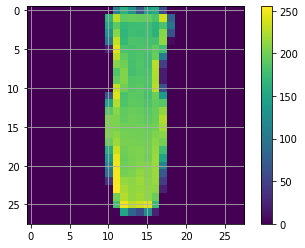

In [7]:
plt.figure()
plt.imshow(train_images[59])
plt.colorbar()
plt.grid(True)
plt.show()

Escalamos los valores entre 0 y 1

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Mostramos las 25 primeras imagenes del training set

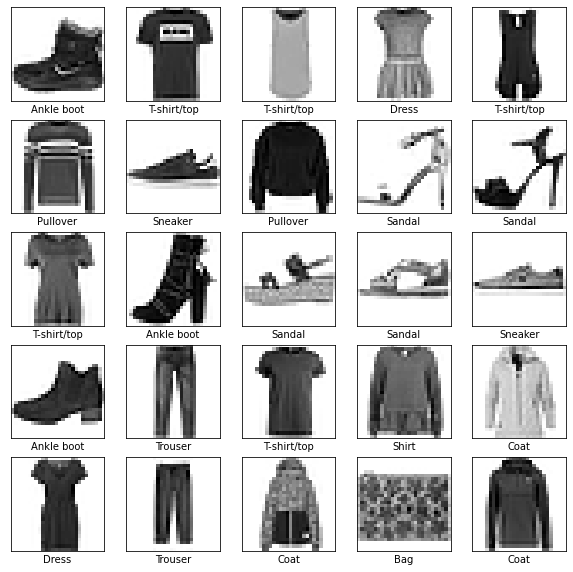

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Construir el Modelo<br>
Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

Configurar las Capas<br>
Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capastf.keras.layers.Dense. Estas estan densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

Compile el modelo<br>
Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

<ul><li>Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.</li>

<li>Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.</li>
<li>Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.</li></ul>

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenar el Modelo<br>
Entrenar el modelo de red neuronal requiere de los siguientes pasos:
<ol>
<li>Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos train_images y train_labels.</li>
<li>el modelo aprende a asociar imagenes y etiquetas.</li>
<li>Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo test_images. Verifique que las predicciones sean iguales a las etiquetas de el arreglotest_labels.</li></ol>
Para comenzar a entrenar, llame el metodo model.fit, es llamado asi por que fit (ajusta) el modelo a el set de datos de entrenamiento:

In [18]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4928 - accuracy: 0.8293
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3723 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2588 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2484 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.88 (o 88%) sobre el set de datos de entrenamiento.

<h3>Evaluar Exactitud</h3>
Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3380 - accuracy: 0.8834 - 570ms/epoch - 2ms/step

Test accuracy: 0.883400022983551


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a overfitting (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

Hacer predicciones
Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [20]:
predictions = model.predict(test_images)


In [21]:
predictions[0]

array([9.66159178e-07, 2.81730106e-09, 3.52494989e-09, 9.94796467e-10,
       5.25727062e-09, 4.91479225e-03, 2.96310986e-07, 1.12995654e-01,
       1.12076791e-07, 8.82088125e-01], dtype=float32)

una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [22]:
np.argmax(predictions[0])


9

Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o class_names[9]. Examinando las etiquetas de test o de pruebas muestra que esta clasificaion es correcta:

In [23]:
test_labels[0]


9

Grafique esto para poder ver todo el set de la prediccion de las 10 clases.


In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

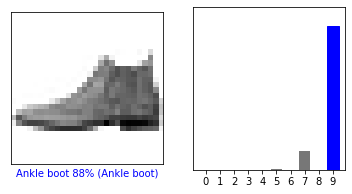

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

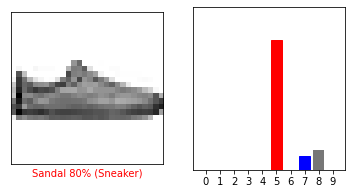

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

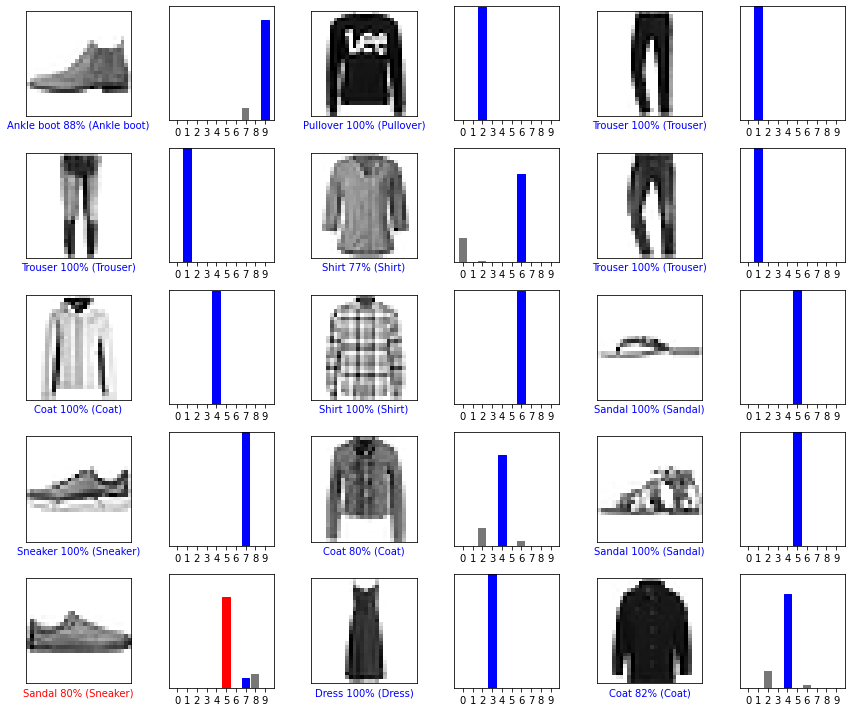

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de tf.keras son optimizados sobre batch o bloques, o coleciones de ejemplos por vez. De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:



In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.7445967e-06 4.7254762e-13 9.9908137e-01 3.1433219e-13 8.4819645e-04
  1.3091318e-14 6.8725269e-05 2.5365766e-18 3.4364758e-10 3.7716302e-15]]


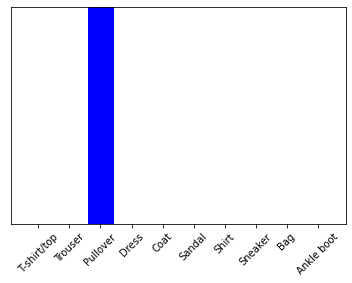

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict retorna una lista de listas para cada imagen dentro del batch o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del batch o bloque:

In [32]:
np.argmax(predictions_single[0])


2